# Forestburn with clusterization (Agent-based model)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Set up functions

Function "clusterize" takes matrix representation of forest and returns dictionary with every point in matrix that is a burned tree as a key and labels it with the number of cluster that is the value.  

In [3]:
def clusterize(matrix):

    ToVisit = []           
    clusters = {}
    size = matrix.shape[0]-1
    current_label = 0
    for x in range(1,size+1):
        for y in range(1,size+1):
            if forest[x,y] == 2 and (x,y) not in clusters:
                clusters[(x,y)] = current_label
                ToVisit.append((x,y))
                while not ToVisit == []:
                    c = ToVisit.pop()
                    surr=[(c[0]+1,c[1]), (c[0],c[1]+1), (c[0],c[1]-1), (c[0]-1,c[1])]
                    for cor in surr:
                        if forest[cor] == 2 and cor not in clusters:
                            clusters[cor] = current_label
                            ToVisit.append(cor)
                current_label +=1       
    return clusters

Clusterization in this function can be described as following:
* Create stack "ToVisit" and dictionary "clusters", read the size of a matrix, set current_label to 0
* Go through every point in matrix and do:
     * If you find a burned tree (so the value 2) and it is not clustered yet:
     * Add this point to the dictionary with current_label as a value and add it's neighbours to a ToVisit stack.
     * when ToVisit stack is not empty pop an element from it and check its neighbours if they are burned trees and not clustered yet - if yes they should be labeled with current_label (added to "clusters") and added to ToVisit stack.
     * If ToVisit stack is empty, that means you have labelled every point in this cluster, change current_label.

Function "burnforest" takes size of the matrix that will be representing the forest and the probability of a given point to be a tree. For instance if the probability is 0.5, then the forest density in theory will be 0.5.

In [22]:
def burnforest(size, p): #create forest and burn it, return matrix 
    
    # SET UP THE FOREST
    forest = np.random.choice([0, 1], size=(size,size), p=[1-p, p])
    forest[:,0] *= 2 #STARTING FIREWALL (Left side of matrix. 0-empty, 1-tree, 2-burning/burned tree)
    forest = np.pad(forest, ((1,1),(1,1)), 'constant') # ADJUSTING EDGES so there will not be boundary problems
    
    # START THE STACK
    ToVisit = []  
    for x in range (1, size+1):
        for y in range (1, size+1):
            if forest[x,y] == 2:
                ToVisit.append((x,y)) # add burning tree to a stack so its neighbours can be checked
            
    # STACK COMPLETING - BURNING FOREST
    while not ToVisit == []:
        c = ToVisit.pop()
        surr=[(c[0]+1,c[1]), (c[0],c[1]+1), (c[0]+1,c[1]+1), (c[0]-1,c[1]),
              (c[0],c[1]-1), (c[0]-1,c[1]-1), (c[0]-1,c[1]+1), (c[0]+1,c[1]-1)]
        for cor in surr:
            if forest[cor] == 1:
                forest[cor] = 2
                ToVisit.append(cor)
                
    return forest

### Simulation

Let's take reasonable size of forest for the visualisation purposes. In what follows forest will be a matrix 20x20 with density of 0.42.

In [20]:
matrix_size = 20               
forest = burnforest(matrix_size, 0.42)
clusters =  clusterize(forest)

### Visualisation

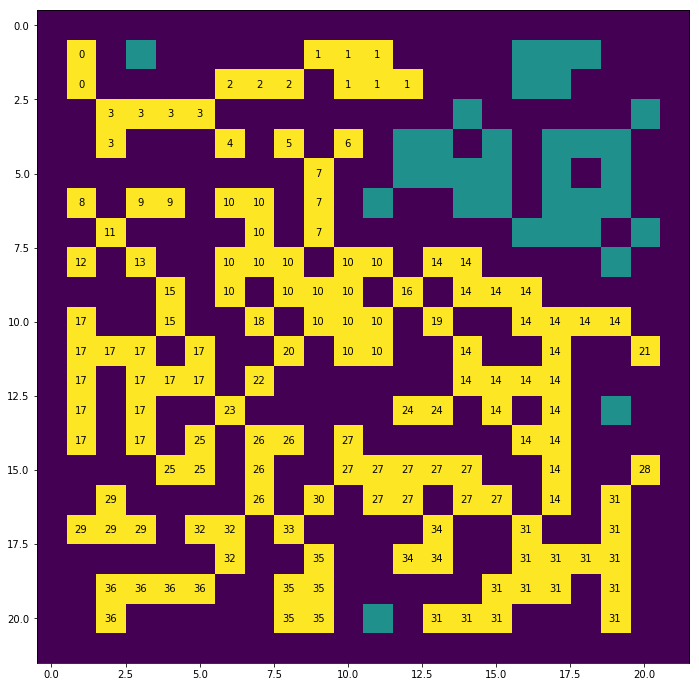

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
im = ax.imshow(forest)   

for x in range(1,matrix_size+1):
    for y in range(1,matrix_size+1):
        if (x,y) in clusters:
            text = ax.text(y, x, clusters[(x,y)],
                           ha="center", va="center", color="k")
plt.show()

It is worth mentioning that forest fire is spreading across 8 adjacent points but clusters are considered only across the four nearest neighbours.